# Algoritmos de Optimización Basados en Nube de Partículas

El objetivo de esta práctica es estudiar el funcionamiento de los Algoritmos de Optimización Basados nube de particulas (PSO). El comportamiento de los algoritmos de OCH implementados deberá compararse con un algoritmo de tipo busqueda local.

Se buscará el mínimo de la funcion de Rosenbrok (más información en http://en.wikipedia.org/wiki/Rosenbrock_function, https://www.indusmic.com/post/rosenbrock-function)

De la función de Rastrigin, para mas información: (https://gist.githubcom/miku/fca6afe05d65302f14c2b6f5242458d6)

A partir de la experimentación efectuada, estos resultados se compararán en una tabla con un algoritmo de búsqueda local (mejor vecino) que solucione el problema utilizando como operador de vecino la generación de 10 vecinos en un entorno de +- 0.1 unidades en cada dimensión (x,y) empezando en el punto (1,1) y entre los valores máximos de +-10 en cada dimensión., con la forma de la Tabla 1.1, para el pso local, global y algoritmo de búsqueda local.

El algoritmo de nube de partículas con los siguientes parámetros:
- 10 partículas
- Inicialización aleatoria
- Comunicación social circular con grado de vecindad 2 (cada partícula tiene 4 vecinos)
- w = 0.729
- phi1 = phi2 = 1.49445

## Librerías

In [14]:
import random
import math

# Graphs and Plots
import matplotlib.pyplot as plt

import numpy as np

import statistics

import pandas as pd

## Parámetros

### Semillas

Para realizar las experimentaciones y que los números no varíen se establecerán semillas, al tratarse de aleatorizaciones para ajustar más los cáculos se tomarán varias semillas.

In [15]:
# Establecer semillas

semilla_1 = 9244889
semilla_2 = 6885052
semilla_3 = 1689685
semilla_4 = 2674794
semilla_5 = 3656827

semillas = [semilla_1, semilla_2, semilla_3, semilla_4, semilla_5]

### Algoritmos

Tal y como se ha indicado en el enunciado para esta ADD se elaboraran 2 algoritmos y 1 de comparación.

Los algoritmos a programar son:
- PSO Local
- PSO Global

Y para comparar:
- El mejor

In [16]:
pso_local = "PSO Local"
pso_global = "PSO Global"
mejor_name = "El Mejor"

### Resultados

Los resultados (de la tabla propuesta para comparar las mediciones) serán guardados en las siguientes variables que posteriormente serán mostradas en tablas.

In [17]:
Data = []
Algorithms_names = []

## Funciones Auxiliares

In [18]:
def flatten(l):
    return [item for sublist in l for item in sublist]

## Funciones auxiliares comunes a los algoritmos

### Función auxiliar de evaluación

Función que es llamada para ejecutar uno de los algoritmos, se encarga de toda la gestión necesaria para obtener los resultados de la ejecución, mostrar gráficas...)

In [19]:
def evaluar_algoritmo(algorithm_name, n_particulas = 10, w = 0.729, phi1 = 1.49445, phi2 = 1.49445, funcion = "rosenbrok", tf = 100, vmax = 0.1, max_evaluaciones=3000, n_vecinos = 10, granularidad = 0.1):
    Header = ["Ev. Medias", "Ev. Mejor", "Ev. Desviación", "Mejor Sol.", "Media Sol.", "Desviación Sol.", "Ev. Mejor Sol.", "Ev. Medias Mejor"]

    # Inicializar medidores
    Ev = []
    Soluciones = []
    Data = []

    # Inicializar variables de mejor solución para la ejecución
    mej_sol = None
    mej_val = float("inf")

    # Para cada semilla:
    for idx, semilla in enumerate(semillas):
        # random.seed(semilla)

        # PSO Búsqueda Local
        if algorithm_name == pso_local:
            plt.figure(figsize=(3, 3))

            # Ejecutar algoritmo
            solucion_mejor, valor_mejor, particulas, contador_evaluaciones, mejores_valores = pso_busqueda_local(n_particulas = n_particulas, w = w, phi1 = phi1, phi2 = phi2, funcion = funcion, tf = tf, vmax = vmax, semilla = semilla)

            # Si el valor obtenido para la semilla actual es mejor que el guardado, se actualiza
            if valor_mejor < mej_val:
                mej_sol = solucion_mejor
                mej_val = valor_mejor

            # Establecer nombre de la imagen
            img_name = str(algorithm_name + " (Semilla " + str(semilla) + ")")

            # Representación 3D de la función y partículas
            representar_3d(particulas = particulas, funcion_name = funcion, img_name=img_name)

            # Mostrar
            plt.show()

        # PSO Búsqueda Global
        elif algorithm_name == pso_global:
            # random.seed(semilla)
            plt.figure(figsize=(3, 3))

            # Ejecutar algoritmo
            solucion_mejor, valor_mejor, particulas, contador_evaluaciones, mejores_valores = pso_busqueda_global(n_particulas = n_particulas, w = w, phi1 = phi1, phi2 = phi2, funcion = funcion, tf = tf, vmax = vmax, semilla = semilla)

            # Si el valor obtenido para la semilla actual es mejor que el guardado, se actualiza
            if valor_mejor < mej_val:
                mej_sol = solucion_mejor
                mej_val = valor_mejor

            # Establecer nombre de la imagen
            img_name = str(algorithm_name + " (Semilla " + str(semilla) + ")")

            # Representación 3D de la función y partículas
            representar_3d(particulas = particulas, funcion_name = funcion, img_name=img_name)

            # Mostrar
            plt.show()

        elif algorithm_name == mejor_name:
             # random.seed(semilla)
            plt.figure(figsize=(3, 3))

            solucion_mejor, valor_mejor, particulas, contador_evaluaciones, mejores_valores = busqueda_local_mejor(max_evaluaciones= max_evaluaciones, n_vecinos = n_vecinos, granularidad = granularidad, val_max = vmax, funcion = funcion)

            if valor_mejor < mej_val:
                mej_sol = solucion_mejor
                mej_val = valor_mejor

            img_name = str(algorithm_name + " (Semilla " + str(semilla) + ")")

            representar_3d(particulas = particulas, funcion_name = funcion, img_name=img_name)

            # Mostrar
            plt.show()

        else:
             # random.seed(semilla)
            plt.figure(figsize=(3, 3))

            solucion_mejor, valor_mejor, particulas, contador_evaluaciones, mejores_valores = busqueda_local_mejor(max_evaluaciones=max_evaluaciones, granularidad = granularidad)
            print("Se ha ejecutado el predeterminado: El Mejor")

            if valor_mejor < mej_val:
                mej_sol = solucion_mejor
                mej_val = valor_mejor
                mej_particulas = particulas

            img_name = str(algorithm_name + " (Semilla " + str(semilla) + ")")

            representar_3d(particulas = particulas, funcion_name = funcion, img_name=img_name)

            # Mostrar
            plt.show()

        # Ev.
        Ev.append(contador_evaluaciones)
        # €
        Soluciones.append(mejores_valores)

    # print(Ev)

    # Ev = flatten(Ev)
    Soluciones_flat = flatten(Soluciones)

    inicio = 0
    fin = inicio
    lista_idx_solucion_min = []
    lista_solucion_min = []

    for idx, semilla in enumerate(semillas):
        inicio = fin
        fin = fin + Ev[idx]

        solucion_iteracion_actual = Soluciones[idx]

        idx_min_solucion_iteracion_actual = solucion_iteracion_actual.index(min(solucion_iteracion_actual))
        lista_solucion_min.append(min(solucion_iteracion_actual))
        lista_idx_solucion_min.append(idx_min_solucion_iteracion_actual)

    print("Mejor posición de partícula: " + str(mej_sol))
    print("Mejor Valor de la posición: " + str(mej_val))

    # 0 Ev. Medias
    Data.append(statistics.median(Ev))

    # 1 "Ev. Mejor" -> mide la covergencia
    Data.append(min(Ev))

    # 2 "Ev. Desviación" -> mide la robustez, a mayor cercania a 0 mayor robustez
    Data.append(statistics.stdev(Ev))

    # 3 "Mejor Solucion"
    Data.append(min(Soluciones_flat))

    # 4 "Media Solucion"
    Data.append(statistics.median(lista_solucion_min))

    # 5 "Desviación Solucion"
    Data.append(statistics.stdev(lista_solucion_min))

    # 6 "Ev. Mejor Solucion"
    semilla_ev_solucion_min = lista_solucion_min.index(min(lista_solucion_min))
    Data.append(str(semilla_ev_solucion_min + 1) + ": " + str(lista_idx_solucion_min[semilla_ev_solucion_min]))

    # 7 Ev. Medias para encontrar mejor solucion
    Data.append(statistics.median(lista_idx_solucion_min))

    # Redondear
    for idx, dat in enumerate(Data):
        if idx != 6: Data[idx] = round(dat,5)

    print(pd.DataFrame(Data, Header, [algorithm_name]))

    return Data

Función para mostrar la tabla final de todos los algoritmos ejecutados con sus correspondientes resultados

In [20]:
def mostrar_estudio_algoritmos(Data):
    Header = ["Ev. Medias", "Ev. Mejor", "Ev. Desviación", "Mejor Sol.", "Media Sol.", "Desviación Sol.", "Ev. Mejor Dinero"]

    '''while len(Data) < len(Header):
        Data.append([0] * len(Header))'''

    print(pd.DataFrame(Data, Header))

    return Data

### Representar 3D
Función para realizar la representación 3D de la función seleccionada y las partículas

In [21]:
def representar_3d(particulas, funcion_name = "rosenbrok", img_name = None):

    if funcion_name == "rosenbrok":
        lim_inf_x = -0.5
        lim_sup_x = 3
        lim_inf_y = -1.5
        lim_sup_y = 2
        funcion = rosenbrok
    else:
        lim_inf_x = -5
        lim_sup_x = 5
        lim_inf_y = -5
        lim_sup_y = 5
        funcion = rastringin

    valores = []

    for i in range(n_particulas):
        particula = particulas[i].copy()

        # Evaluar la función objetivo en posición
        valores.append(evaluar(particula[0], particula[1], funcion_evaluacion = funcion_name))

    ax = plt.axes(projection='3d')

    X = np.arange(lim_inf_x, lim_sup_x, 0.01)
    Y = np.arange(lim_inf_y, lim_sup_y, 0.01)
    X, Y = np.meshgrid(X, Y)
    assert len(X) == len(Y)
    myfunc_vec = np.vectorize(funcion)
    Z = myfunc_vec(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z,
                           alpha = 0.2,
                           cmap="seismic",
                           linewidth=0,
                           antialiased=True)

    particulas_x = np.array(particulas)[:,0]
    particulas_x = particulas_x.tolist()

    particulas_y = np.array(particulas)[:,1]
    particulas_y = particulas_y.tolist()

    ax.scatter3D(particulas_x, particulas_y, valores[:],
                 alpha = 1,
                 c = valores,
                 cmap='gist_rainbow');
    ax.view_init(10, 60)

    ax.set_title(img_name);

## Algoritmos

### Funciones

#### Rosenbrok

La función Rosenbrock es una función matemática utilizada en optimización y que recibe su nombre del matemático Howard H. Rosenbrock. Es una función no lineal que es comúnmente utilizada para probar el rendimiento de algoritmos de optimización, especialmente aquellos que buscan encontrar el mínimo global de una función.

La función Rosenbrock se define como:

f(x, y) = (a - x)^2 + b(y - x^2)^2

donde a y b son constantes, y x e y son variables. La función tiene un mínimo global en el punto (a, a^2), con un valor de 0.

_Rosenbrock, H. H. (1960). An automatic method for finding the greatest or least value of a function. The Computer Journal, 3(3), 175-184._

_Pohlheim, H. (2007). Examples of objective functions. Retrieved, 4(10), 2012._

In [22]:
def rosenbrok(x, y):
    return ((1-x) ** 2) + 100 * (y- (x ** 2)) ** 2

In [23]:
def rosenbrok_plot(x1, x2, E=45, A=45):
    X1, X2 = np.meshgrid(x1, x2)
    fig = plt.figure(figsize = [12, 8])
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, rosenbrok(X1, X2), cmap='jet', alpha=0.8)
    ax.plot_wireframe(X1, X2, rosenbrok(X1, X2), rcount=15, ccount=15)
    ax.view_init(elev=E, azim=A)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.contourf(x1, x2, rosenbrok(X1, X2))

#### Rastrigin

La función de Rastrigin es una función matemática no lineal utilizada en optimización y que recibe su nombre del matemático y físico estadounidense Leonid Rastrigin. Es una función comúnmente utilizada para evaluar algoritmos de optimización global, debido a su complejidad y a su gran cantidad de mínimos locales.

La función Rastrigin se define como:

f(x) = An + ∑ [x^2 - Acos(2pix)]

donde A es una constante, n es la dimensión de la función, y x es un vector de variables. La función tiene un mínimo global en el punto (0,0,...,0), con un valor de 0.

_Pohlheim, H. (2007). Examples of objective functions. Retrieved, 4(10), 2012._


In [24]:
def rastringin(x1, x2):
    return 20 + x1 ** 2 + x2 ** 2 - (10 * (math.cos(2 * math.pi * x1) + math.cos(2 * math.pi * x2)))

## PSO

El algoritmo de Optimización por Enjambre de Partículas es un algoritmo de optimización metaheurístico inspirado en el comportamiento social de los enjambres de animales. El objetivo es encontrar el óptimo global de una función de fitness, mediante la iteración de un enjambre de partículas que se mueven por el espacio de búsqueda, actualizando su posición y velocidad en función de su mejor posición conocida y la mejor posición global del enjambre.

### PSO Funciones comunes

Para facilitar y simplificar el código se han elaborado dos funciones auxiliares, una de condición de parada para terminar el bucle principal y otra de evaluación que según la función seleccionada para la ejecución presente llamará a la función de rosenbrock o la de rastrigin.

In [25]:
def condicion_de_parada(t, tf):
    return not (t < tf)

def evaluar(x,y, funcion_evaluacion="rosenbrok"):
    if funcion_evaluacion == "rosenbrok":
        return rosenbrok(x,y)
    else:
        return rastringin(x,y)

### PSO Búsqueda Local

El PSO local es una variante del PSO que se enfoca en encontrar soluciones óptimas locales. Utiliza una estrategia de reinicio para cada partícula en el enjambre, que implica reiniciar la posición y velocidad de una partícula si no ha mejorado su posición actual después de un número determinado de iteraciones. Este enfoque permite a las partículas escapar de los mínimos locales y explorar más a fondo el espacio de búsqueda.

In [39]:
def pso_busqueda_local(n_particulas = 10, w = 0.729, phi1 = 1.49445, phi2 = 1.49445, funcion = "rosenbrok", tf = 100, vmax = 0.1, semilla = semilla_1):
    random.seed(semilla)

    # Inicializar parametros para medir
    contador_evaluaciones = 0
    mejores_valores = []

    if funcion == "rosenbrok":
        lim_inf_x = -0.5
        lim_sup_x = 3
        lim_inf_y = -1.5
        lim_sup_y = 2
    else:
        lim_inf_x = -5
        lim_sup_x = 5
        lim_inf_y = -5
        lim_sup_y = 5

    t = 0

    solucion_mejor = None
    valor_mejor = float("+inf")

    particulas_iniciales = []
    velocidades_iniciales = []

    # Inicializar Xi (particulas) y Vi (velocidades)
    for i in range(n_particulas):
        # Inicializar Xi y Vi -> inicialización aleatoria
        xi = random.uniform(lim_inf_x, lim_sup_x)
        yi = random.uniform(lim_inf_y, lim_sup_y)
        particulas_iniciales.append([xi, yi])

        # Inicializar las velocidades
        # vi = [0,0]
        # con vi_x y vi_y se consiguen muy buenos resultados
        vi_x = random.uniform(-vmax, vmax)
        vi_y = random.uniform(-vmax, vmax)
        velocidades_iniciales.append([vi_x, vi_y])

    particulas = particulas_iniciales.copy()
    velocidades = velocidades_iniciales.copy()

    # Actualizar la posición y velocidad de cada partícula en cada iteración
    while not condicion_de_parada(t, tf): # Mientras (no se cumpla la condición de parada) hacer
        t += 1

        # Mejor particula de las actuales
        for i in range(n_particulas):
            particula = particulas[i].copy()

            # Evaluar la función objetivo en posición
            valor_actual = evaluar(particula[0], particula[1], funcion_evaluacion = funcion)
            contador_evaluaciones += 1

            # Actualizar la mejor posición individual
            if valor_actual < valor_mejor: # Si F(Xi) es mejor que F(pBest) entonces
                solucion_mejor = particula.copy()
                valor_mejor = valor_actual
                mejores_valores.append(valor_mejor)

        # Actualizar posición de las partículas
        for i in range(n_particulas):
            # Escoger lBest i, la partícula con mejor fitness del entorno de Xi
            # Generar entorno -> vecindad = 2; hay 4 vecinos por particula
            particulas_entorno = ([particulas[(i+(n_particulas-2))%n_particulas].copy(), particulas[(i+(n_particulas-1))%n_particulas].copy(), particulas[(i+1)%n_particulas].copy(), particulas[(i+2)%n_particulas].copy()])
            valores_entorno = ([evaluar(particula[0], particula[1], funcion_evaluacion = funcion) for particula in particulas_entorno])
            contador_evaluaciones += len(particulas_entorno)
            mejor_particula_entorno = (particulas_entorno[valores_entorno.index(min(valores_entorno))])

            # Calcular Vi, la velocidad de Xi, de acuerdo a pBest i y lBest i
            # Calcular la nueva velocidad de la partícula
            rp = [random.uniform(0, 1) for _ in range(2)]
            rg = [random.uniform(0, 1) for _ in range(2)]

            velocidad_x = w * velocidades[i][0] + phi1 * rp[0] * (solucion_mejor[0] - particulas[i][0]) + phi2 * rg[0] * (mejor_particula_entorno[0] - particulas[i][0])

            if -vmax <= velocidad_x <= vmax:
                velocidades[i][0] = velocidad_x

            velocidad_y = w * velocidades[i][1] + phi1 * rp[1] * (solucion_mejor[1] - particulas[i][1]) + phi2 * rg[1] * (mejor_particula_entorno[1] - particulas[i][1])

            if -vmax <= velocidad_y <= vmax:
                velocidades[i][1] = velocidad_y

            # Calcular la nueva posición Xi, de acuerdo a Xi y Vi
            # Actualizar la posición de la partícula

            if lim_inf_x <= (particulas[i][0] + velocidades[i][0]) <= lim_sup_x:
                particulas[i][0] += velocidades[i][0]

            if lim_inf_y <= (particulas[i][1] + velocidades[i][1]) <= lim_sup_y:
                particulas[i][1] += velocidades[i][1]

    # print("Mejor solucion ", solucion_mejor)
    # print("Mejor valor ", valor_mejor)
    # print("Particulas ", particulas)

    return solucion_mejor, valor_mejor, particulas, contador_evaluaciones, mejores_valores

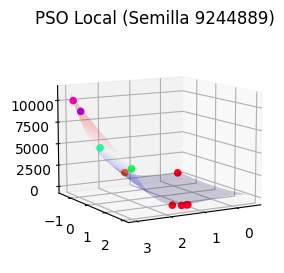

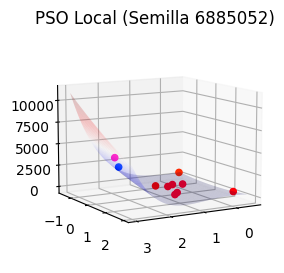

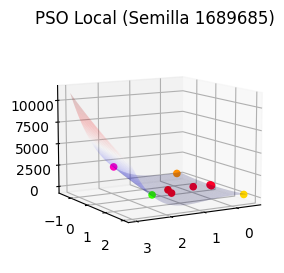

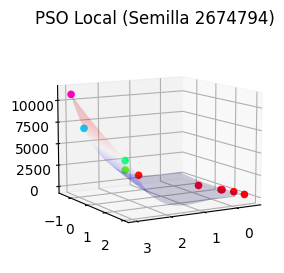

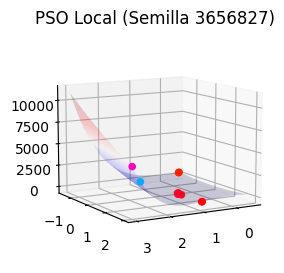

Mejor posición de partícula: [0.9438186776813234, 0.8908896013077231]
Mejor Valor de la posición: 0.003157260753756083
                 PSO Local
Ev. Medias            5000
Ev. Mejor             5000
Ev. Desviación         0.0
Mejor Sol.         0.00316
Media Sol.         0.06847
Desviación Sol.    0.06711
Ev. Mejor Sol.       5: 15
Ev. Medias Mejor        11


In [40]:
n_particulas = 10
w = 0.729
phi1 = 1.49445
phi2 = 1.49445
funcion = "rosenbrok"
tf = 100
vmax = 0.1

algorithm_name = pso_local

Algorithms_names.append(algorithm_name)

pso_local_data = evaluar_algoritmo(algorithm_name, n_particulas = n_particulas, w = w, phi1 = phi1, phi2 = phi2, funcion = funcion, tf = tf, vmax = vmax)

Data.append(pso_local_data)

### PSO Búsqueda Global

En el PSO global, cada partícula en el enjambre representa una solución candidata en el espacio de búsqueda. Las partículas se mueven a través del espacio de búsqueda siguiendo dos componentes: su mejor posición histórica y la mejor posición histórica del enjambre.

La ecuación de actualización de posición de la partícula se define como:

x_i (t+1) = x_i (t) + v_i (t+1)

donde x_i (t) es la posición actual de la partícula i en el tiempo t, v_i (t+1) es la velocidad actualizada de la partícula i en el tiempo t+1. La velocidad de la partícula se actualiza de acuerdo a la siguiente ecuación:

v_i (t+1) = w * v_i (t) + phi_1 * r_1 * (p_i - x_i (t)) + phi_2 * r_2 * (g - x_i (t))

donde w es el peso de inercia, phi_1 y phi_2 son los factores de aceleración cognitiva y social, respectivamente. r_1 y r_2 son números aleatorios generados de forma uniforme entre 0 y 1. p_i es la mejor posición histórica de la partícula i y g es la mejor posición histórica del enjambre.

In [37]:
def pso_busqueda_global(n_particulas = 10, w = 0.729, phi1 = 1.49445, phi2 = 1.49445, funcion = "rosenbrok", tf = 100, vmax = 0.1, semilla = semilla_1):
    random.seed(semilla)

    # Inicializar parametros para medir
    contador_evaluaciones = 0
    mejores_valores = []

    # establecer limites según función evaluación
    if funcion == "rosenbrok":
        lim_inf_x = -0.5
        lim_sup_x = 3
        lim_inf_y = -1.5
        lim_sup_y = 2
    else:
        lim_inf_x = -5
        lim_sup_x = 5
        lim_inf_y = -5
        lim_sup_y = 5

    t = 0

    mejor_solucion = None
    mejor_solucion_global = None

    valor_mejor = float("+inf")
    valor_mejor_global = float("+inf")

    particulas_iniciales = []
    velocidades_iniciales = []

    # Inicializar
    for i in range(n_particulas):
        # Inicializar Xi y Vi -> inicialización aleatoria
        xi = random.uniform(lim_inf_x, lim_sup_x)
        yi = random.uniform(lim_inf_y, lim_sup_y)
        particulas_iniciales.append([xi, yi])

        # Inicializar las velocidades
        # vi = [0,0]
        # con vi_x y vi_y se consiguen muy buenos resultados
        vi_x = random.uniform(-vmax, vmax)
        vi_y = random.uniform(-vmax, vmax)
        velocidades_iniciales.append([vi_x, vi_y])

    particulas = particulas_iniciales.copy()
    velocidades = velocidades_iniciales.copy()

    # Inicializar y las mejores posiciones de cada partícula
    particulas_mejores = particulas.copy()
    valores_mejores_ini = [evaluar(particula[0], particula[1]) for particula in particulas]

    valores_mejores = valores_mejores_ini.copy()

    # Actualizar la posición y velocidad de cada partícula en cada iteración
    while not condicion_de_parada(t, tf): # Mientras (no se cumpla la condición de parada) hacer
        t += 1

        ''' En lugar de actualizar la mejor solución individual, se debe actualizar la mejor solución global. '''
        # Mejor particula de las actuales
        for i in range(n_particulas):
            particula = particulas[i].copy()

            # Evaluar la función objetivo en posición
            valor_actual = evaluar(particula[0], particula[1], funcion_evaluacion = funcion)
            contador_evaluaciones += 1

            # Actualizar la mejor posición individual
            if valor_actual < valor_mejor: # Si F(Xi) es mejor que F(pBest) entonces
                mejor_solucion = particula.copy()
                # mejores_soluciones.append(mejor_solucion)
                valor_mejor = valor_actual
                particulas_mejores[i] = particula.copy()

                mejores_valores.append(valor_mejor)

            if valor_mejor < valor_mejor_global:
                mejor_solucion_global = mejor_solucion.copy()
                valor_mejor_global = valor_mejor

        # Actualizar posición de las partículas
        for i in range(0, n_particulas):
            '''Calcular Vi, la velocidad de Xi, de acuerdo a pBest i y gBest i'''
            # Calcular Vi, la velocidad de Xi, de acuerdo a pBest i y lBest i
            # Calcular la nueva velocidad de la partícula
            rp = [random.uniform(0, 1) for _ in range(2)]
            rg = [random.uniform(0, 1) for _ in range(2)]

            pBesti = particulas_mejores[i].copy()
            gBesti = mejor_solucion_global

            velocidad_x = w * velocidades[i][0] + phi1 * rp[0] * (pBesti[0] - particulas[i][0]) + phi2 * rg[0] * (gBesti[0] - particulas[i][0])

            if -vmax <= velocidad_x <= vmax:
                velocidades[i][0] = velocidad_x

            velocidad_y = w * velocidades[i][1] + phi1 * rp[1] * (pBesti[1] - particulas[i][1]) + phi2 * rg[1] * (gBesti[1] - particulas[i][1])

            if -vmax <= velocidad_y <= vmax:
                velocidades[i][1] = velocidad_y

            # Calcular la nueva posición Xi, de acuerdo a Xi y Vi
            if lim_inf_x <= (particulas[i][0] + velocidades[i][0]) <= lim_sup_x:
                particulas[i][0] += velocidades[i][0]

            if lim_inf_y <= (particulas[i][1] + velocidades[i][1]) <= lim_sup_y:
                particulas[i][1] += velocidades[i][1]

    '''print("Mejor solucion ", mejor_solucion)
    print("Mejor valor ", valor_mejor)
    print("Particulas ", particulas)'''

    return mejor_solucion, valor_mejor, particulas, contador_evaluaciones, mejores_valores

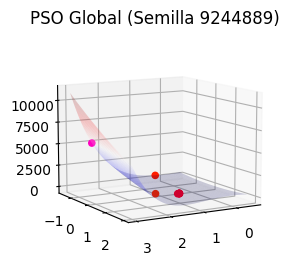

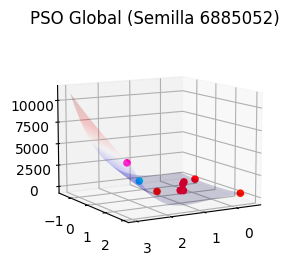

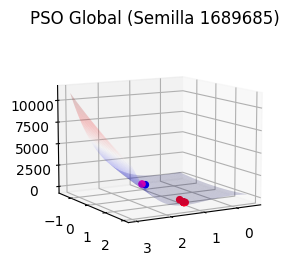

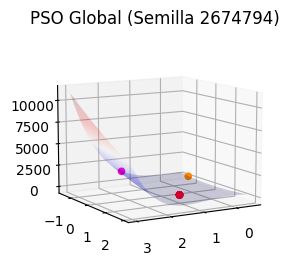

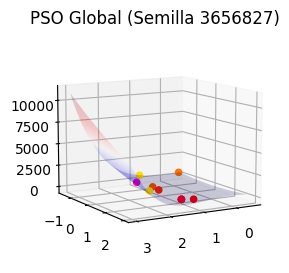

Mejor posición de partícula: [0.9243899460569867, 0.8546027384357341]
Mejor Valor de la posición: 0.005718003137947852
                 PSO Global
Ev. Medias             1000
Ev. Mejor              1000
Ev. Desviación          0.0
Mejor Sol.          0.00572
Media Sol.          0.02666
Desviación Sol.     0.05995
Ev. Mejor Sol.        4: 29
Ev. Medias Mejor         33


In [38]:
n_particulas = 10
w = 0.729
phi1 = 1.49445
phi2 = 1.49445
funcion = "rosenbrok"
tf = 100
vmax = 0.1

algorithm_name = pso_global

Algorithms_names.append(algorithm_name)

pso_local_data = evaluar_algoritmo(algorithm_name, n_particulas = n_particulas, w = w, phi1 = phi1, phi2 = phi2, funcion = funcion, tf = tf, vmax = vmax)

Data.append(pso_local_data)

### El Mejor

In [17]:
def generador_vecino(solucion, granularidad = 0.1, n_vecinos = 10):
    vecinos = []

    for _ in range(n_vecinos):
        # Generar un número aleatorio entre -granularidad y granularidad
        # values = [random.uniform(-granularidad, granularidad) for _ in range(2)]
        

        vecinos.append([solucion[0] + values[0], solucion[1] + values[1]])

    assert len(vecinos) == n_vecinos

    return solucion

def generar_mejor_vecino_mejor(solucion_actual, granularidad, n_vecinos = 10, funcion = "rosenbrok"):
    contador_evaluaciones = 0

    vecinos = generador_vecino(solucion = solucion_actual, granularidad = granularidad, n_vecinos = n_vecinos)

    valor_solucion_actual = evaluar(solucion_actual[0], solucion_actual[1], funcion)
    contador_evaluaciones += 1

    valor_mejor_vecino = valor_solucion_actual
    mejor_vecino = solucion_actual.copy()

    for vecino in vecinos:
        valor_vecino = evaluar(vecino[0], vecino[1], funcion)
        contador_evaluaciones += 1

        # Si el mejor vecino mejora la solución actual, se actualiza la solución actual
        if valor_vecino > valor_mejor_vecino:
            mejor_vecino = vecino.copy()
            valor_mejor_vecino = valor_vecino

    return mejor_vecino, valor_mejor_vecino, contador_evaluaciones

def busqueda_local_mejor(max_evaluaciones=3000, n_vecinos = 10, granularidad = 0.1, val_max = 10, funcion = "rosenbrok"):

    # Parametros de control
    soluciones_mejores = []
    contador_evaluaciones = 0

    # Generar solución inicial
    if funcion == "rosenbrok":
        lim_inf_x = -0.5
        lim_sup_x = 3
        lim_inf_y = -1.5
        lim_sup_y = 2
    else:
        lim_inf_x = -5
        lim_sup_x = 5
        lim_inf_y = -5
        lim_sup_y = 5

    # Inicializar Xi (particulas) y Vi (velocidades)

    # Inicializar Xi -> inicialización en 1,1 ->
    xi = random.uniform(lim_inf_x, lim_sup_x)
    yi = random.uniform(lim_inf_y, lim_sup_y)
    particula = [xi, yi]

    solucion_actual = particula.copy()

    valor_solucion_actual = evaluar(x = particula[0], y = particula[1], funcion_evaluacion = funcion)
    contador_evaluaciones += 1

    valor_mejor_vecino = valor_solucion_actual

    while (valor_mejor_vecino < valor_solucion_actual) or (contador_evaluaciones[0] < max_evaluaciones):

        valor_mejor_vecino = valor_solucion_actual

        # Obtiene el mejor vecino del entorno
        vecino, valor_vecino, aux_contador = generar_mejor_vecino_mejor(solucion_actual, granularidad)
        contador_evaluaciones += aux_contador

        if valor_vecino > valor_solucion_actual:
            valor_solucion_actual = valor_vecino
            solucion_actual = vecino

        soluciones_mejores.append(valor_solucion_actual)

    return solucion_actual, contador_evaluaciones, soluciones_mejores

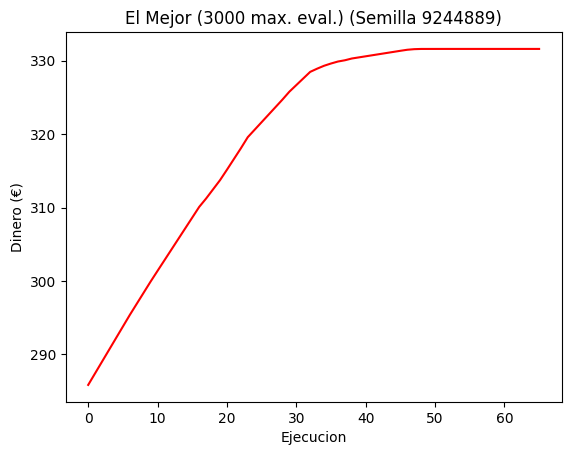

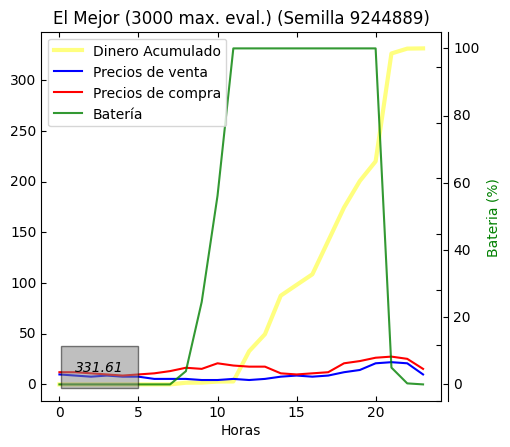

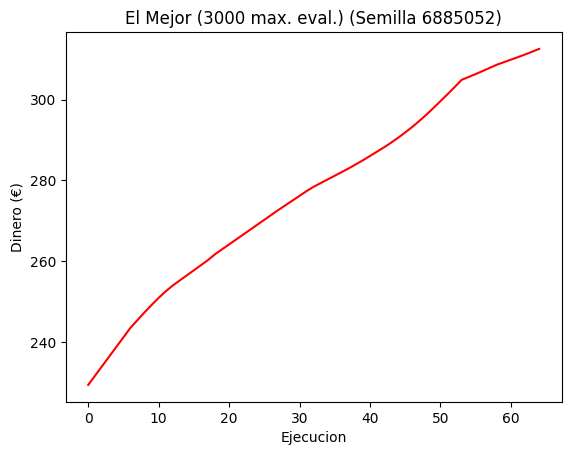

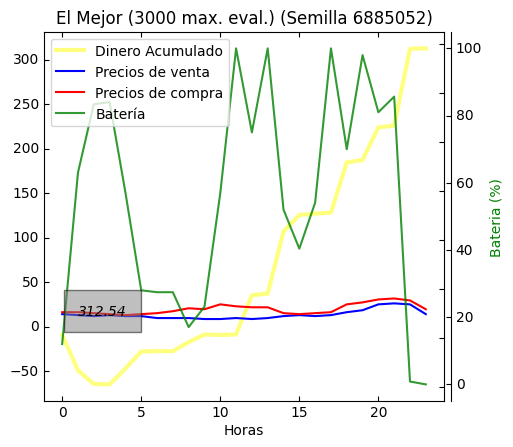

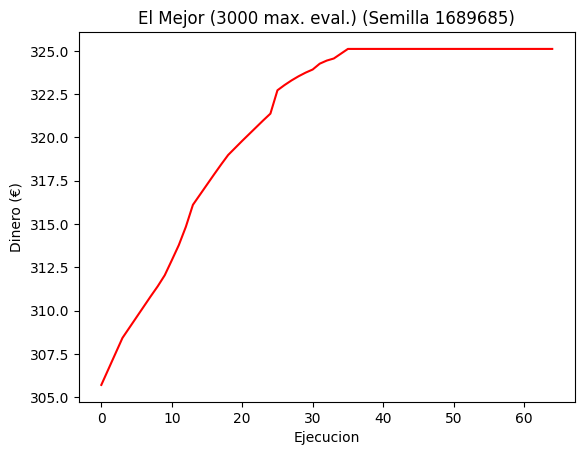

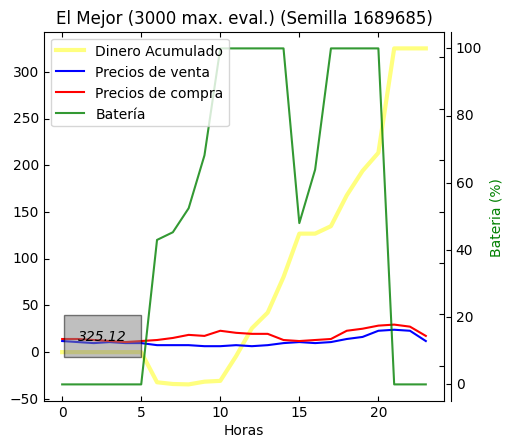

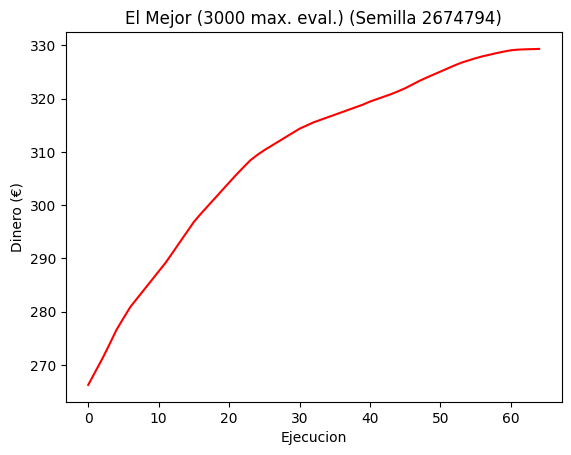

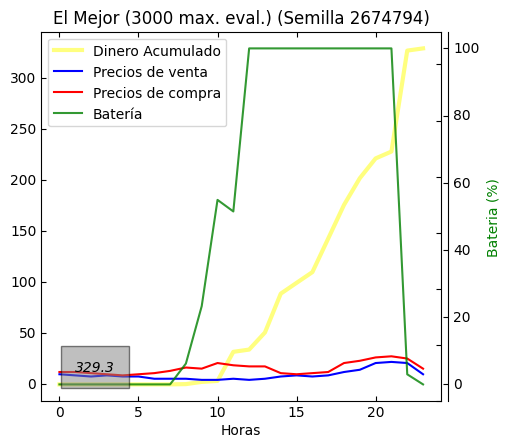

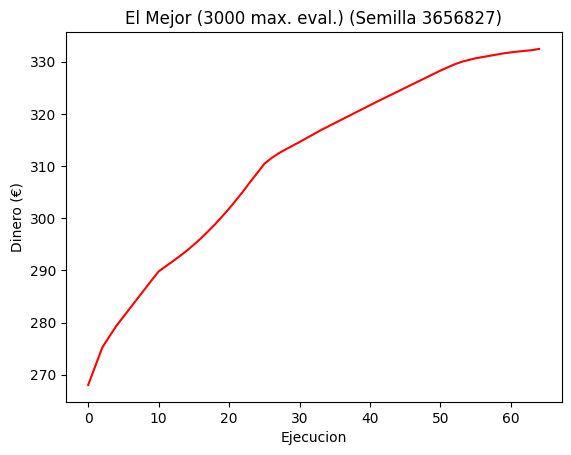

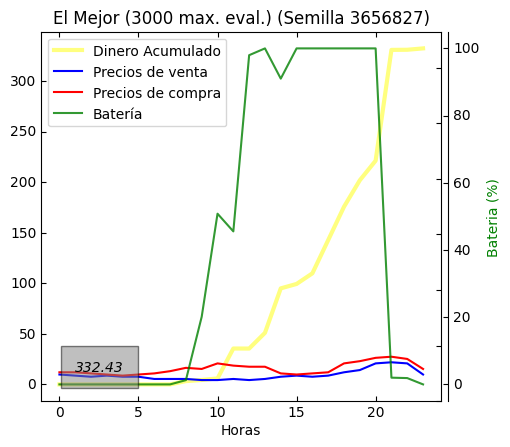

                 El Mejor
Ev. Medias           3038
Ev. Mejor            3009
Ev. Desviación      15.03
Mejor €            332.43
Media €             329.3
Desviación €         8.15
Ev. Mejor Dinero    5: 64
Ev. Medias Mejor       64


In [24]:
max_evaluaciones=3000
n_vecinos = 10
granularidad = 10

n_particulas = 10
w = 0.729
phi1 = 1.49445
phi2 = 1.49445
funcion = "rosenbrok"
tf = 100
vmax = 0.1

algorithm_name = mejor_name

Algorithms_names.append(algorithm_name)

mejor_data = evaluar_algoritmo(algorithm_name, n_particulas = n_particulas, w = w, phi1 = phi1, phi2 = phi2, funcion = funcion, tf = tf, vmax = vmax, max_evaluaciones= max_evaluaciones, n_vecinos = n_vecinos, granularidad = granularidad)

Data.append(mejor_data)

In [ ]:
Header = ["Ev. Medias", "Ev. Mejor", "Ev. Desviación", "Mejor €", "Media €", "Desviación €", "Ev. Mejor €", "Ev. Medias Mejor"]

# Algorithms_names.append(0)
# Data.append([0,0,0,0,0,0,0,0])

import numpy as np

Data_copy = np.array(Data)

# print(pd.DataFrame(Data.transpose(), Header, column))

# ev_media, ev_mejor, ev_desviacion, euro_mejor, euro_media, euro_desviacion = v

format_row = "{:>19}" * (len(Header) + 1)
print(format_row.format("", *Algorithms_names))
for dat, row in zip(Header, Data_copy.transpose()):
    print(format_row.format(dat, *row))